# Lab 11 - Model Selection - [25 points]

Let's return to our instagram dataset (from the first exam) to see if we can build a classifier that can predict fake instagram accounts. Ideally, we would like to find a model that avoids overfitting, but still has a high degree of predictive power.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. [.5 pt] Read the fake_insta.csv into a dataframe called df.

In [2]:
df=pd.read_csv("fake_insta.csv")
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,143,273,14890,7369,real
4,yes,1,76,6,225,356,real


### 2. [1 pt] Next, create a scatterplot for every pair of numerical variables in the dataset with the following stipulations.
1. These plots should all be in the same figure. (Our linear regression lecture notes discuss how to do this).
2. The code that creates these pairwise scatterplots all in the same figure also has a 'hue' parameter (like we've seen in other seaborn visualizations.) Use this 'hue' parameter to color code the points in each of these scatterplots by 'account_type.'

<function matplotlib.pyplot.show(close=None, block=None)>

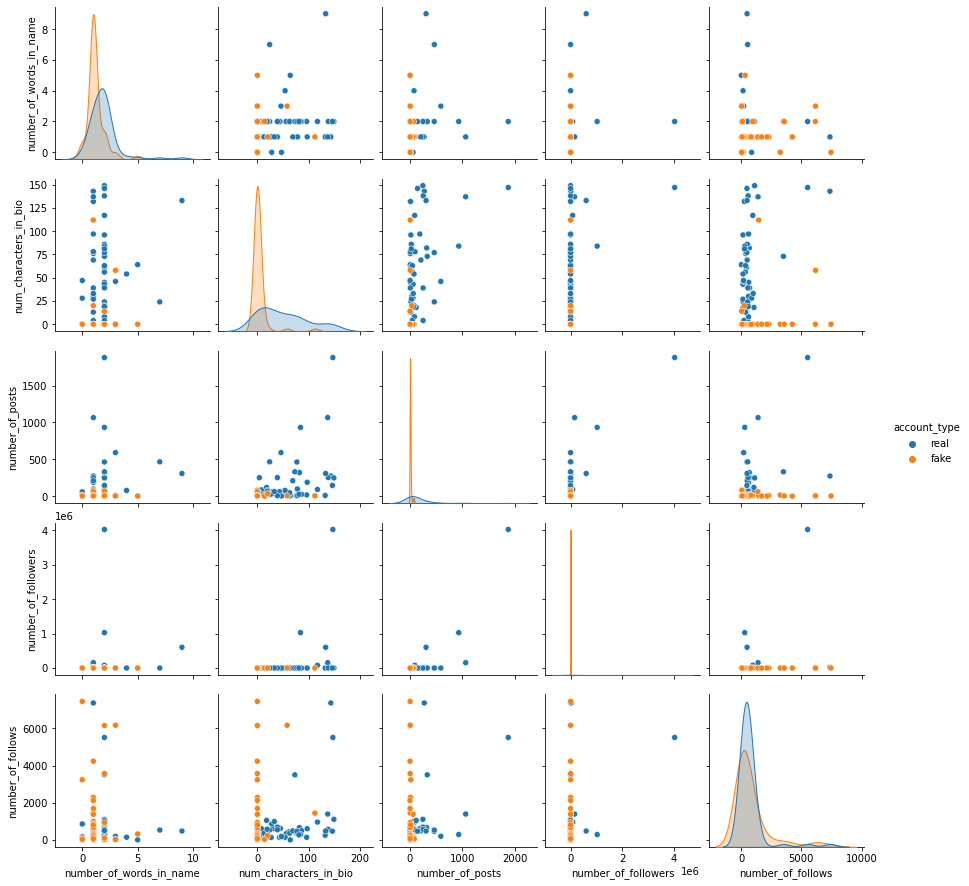

In [3]:
sns.pairplot(data=df, hue='account_type')
plt.show

### 3. [0.5 pt] Next, create a new variable in df that is equal to 1 when the account type is fake and is equal to 0 when the account type is real.

In [4]:
df['y']=df['account_type'].map({'real':0, 'fake':1})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,yes,1,30,35,488,604,real,0
1,yes,5,64,3,35,6,real,0
2,yes,2,82,319,328,668,real,0
3,yes,1,143,273,14890,7369,real,0
4,yes,1,76,6,225,356,real,0


### 4. [1 pt] Create a training dataset that is a random selection of 80% of the df with the remaining 20% as the test dataset. Use a random_state of 1000 to do this.

In [5]:
df_train, df_test = train_test_split(df, 
                                   test_size=0.2, 
                                   random_state=1000)

## Full Model
### 5. [1 pt] Next, fit a full model with your training data that predicts whether the account is fake with the following explanatory variables:
* has_a_profile_pic
* number_of_words_in_name
* num_characters_in_bio
* number_of_posts
* number_of_followers
* number_of_follows

### Print out the summary.

In [6]:
mod1=smf.logit('y ~ has_a_profile_pic + number_of_words_in_name + num_characters_in_bio + number_of_posts + number_of_followers + number_of_follows',data=df_train).fit()
mod1.summary()

         Current function value: 0.133468
         Iterations: 35


C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Tuan\Coding\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.8072
Time:                        17:44:10   Log-Likelihood:                -12.813
converged:                      False   LL-Null:                       -66.459
Covariance Type:            nonrobust   LLR p-value:                 7.519e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   96.6905   1.54e+06   6.29e-05      1.000   -3.01e+06    3.01e+06
has_a_profile_pic[T.yes]   -92.9172   1.54e+06  -6.05e-05      1.000   -3.01e+06    3.01e+06
number_of_words_in_name     -1.0319      0.540     -1.910      0.056      -2.091       0.027
num_characters_in_bio       -0.1023      0.046     -2.199      0.028      -0.193      -0.011
number_of_posts              0.0003      0.012      0.029      0.977      -0.023       0.023
number_of_followers         -0.0245      0.009     -2.759      0.006      -0.042      -0.007
number_of_follows            0.0082      0.003      2.995      0.003       0.003       0.013
============================================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 6 [1 pt] What is the log likelihood for this full model?

In [7]:
print("Log-likelihood: -12.813")

Log-likelihood: -12.813


### 7. [1 pt] What is the AIC and BIC for this model?

In [8]:
print("AIC: ",mod1.aic)

AIC:  39.625915080535215


In [9]:
print("BIC: ",mod1.bic)

BIC:  57.57635242081007


### 8. [2 pt] Use the test dataset to display the ROC curve and calculate the AUC for this model.

In [10]:
phat = mod1.predict(exog=df_test)
df_test['predictive_prop']=phat
df_test['y_hat']=1*(df_test['predictive_prop']>=0.5)
df_test.head()

<ipython-input-10-5f47de0ff7e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictive_prop']=phat
<ipython-input-10-5f47de0ff7e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_hat']=1*(df_test['predictive_prop']>=0.5)


,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,predictive_prop,y_hat
70,no,2,14,0,46,38,fake,1,1.000000e+00,1
104,yes,1,0,3,214,829,fake,1,9.861213e-01,1
39,yes,2,73,330,1572,3504,real,0,1.743374e-07,0
65,no,0,0,0,31,124,fake,1,1.000000e+00,1
73,no,1,0,0,21,1,fake,1,1.000000e+00,1


In [11]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'], y_score=phat)
auc = roc_auc_score(y_true=df_test['y'], y_score=phat)
print('AUC: ',auc)

AUC:  1.0


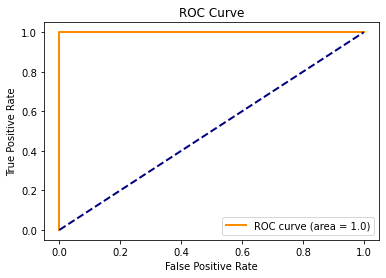

In [13]:
plot_roc(fprs, tprs, auc)

### 9. [1 pt] What does the AUC tell us about the predictive power of this model?

We need the AUC is as close to 1 as possible. In this model, the AUC is 1, which means that the accuracy of this model is really high. Therefore, the predictive power of this model is also really high.

### 10 [1 pt] What probability threshold should we use in this model?

In [14]:
print('fprs :')
print(fprs)
print('tprs: ')
print(tprs)
print('thresholds')
print(thresholds)
print('p Thresholds')
p_thresholds=np.exp(thresholds)/(1+np.exp(thresholds))
print(np.round(p_thresholds,2))

fprs :
[0. 0. 0. 1.]
tprs: 
[0.  0.5 1.  1. ]
thresholds
[2.00000000e+000 1.00000000e+000 6.00325872e-001 4.03998320e-138]
p Thresholds
[0.88 0.73 0.65 0.5 ]


With p-threshold=0.65, the true positive rate is as high as 1 and the false positive rate is as low as 0. Thus, we should use this probability threshold.

## Reduced Model
### 11 [2pt] Next, create a reduced logistic regression model that predicts whether the account is fake using only the explanatory variables (slopes) *that were statistically significant (with $\alpha=0.10$)* in the full model.

(In other words, only choose the explanatory variables values in which we would reject the null hypothesis with $\alpha=0.10$ for their respective hypothesis tests
$H_0: \beta_i=0$
$H_A: \beta_i\neq 0$).

number_of_words_in_name, num_characters_in_bio, number_of_followers, number_of_follows are the statistically significant slopes

In [15]:
mod0=smf.logit('y ~ number_of_words_in_name + num_characters_in_bio + number_of_followers + number_of_follows',data=df_train).fit()


Optimization terminated successfully.
         Current function value: 0.312378
         Iterations 13


C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


### Print out the summary for this reduced model.

In [16]:
mod0.summary()

C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                          Logit   Df Residuals:                       91
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.5488
Time:                        17:44:10   Log-Likelihood:                -29.988
converged:                       True   LL-Null:                       -66.459
Covariance Type:            nonrobust   LLR p-value:                 5.430e-15
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.0348      0.687      2.961      0.003       0.688       3.381
number_of_words_in_name    -0.7341      0.402     -1.825      0.068      -1.522       0.054
num_characters_in_bio      -0.1507      0.047     -3.227      0.001      -0.242      -0.059
number_of_followers        -0.0013      0.001     -1.986      0.047      -0.003   -1.75e-05
number_of_follows           0.0020      0.001      3.192      0.001       0.001       0.003
===========================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 12. [1pt] What is the log likelihood for this full model?

In [17]:
print("Log likelihood of this reduced model is -29.988")

Log likelihood of this reduced model is -29.988


### 13 [1 pt] What is the AIC and BIC for this model?

In [18]:
print("AIC: ",mod0.aic)

AIC:  69.97662369799367


In [19]:
print("BIC: ",mod0.bic)

BIC:  82.79836465533285


### 14 [2 pt] Use the test dataset to display the ROC curve and calculate the AUC for this model.

In [20]:
phat2 = mod0.predict(exog=df_test)
df_test['predictive_prop2']=phat2
df_test['y_hat2']=1*(df_test['predictive_prop2']>=0.5)
df_test.head()

<ipython-input-20-1b57e1c63995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictive_prop2']=phat2
<ipython-input-20-1b57e1c63995>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_hat2']=1*(df_test['predictive_prop2']>=0.5)


,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,predictive_prop,y_hat,predictive_prop2,y_hat2
70,no,2,14,0,46,38,fake,1,1.000000e+00,1,0.178067,0
104,yes,1,0,3,214,829,fake,1,9.861213e-01,1,0.934495,1
39,yes,2,73,330,1572,3504,real,0,1.743374e-07,0,0.003742,0
65,no,0,0,0,31,124,fake,1,1.000000e+00,1,0.903707,1
73,no,1,0,0,21,1,fake,1,1.000000e+00,1,0.781563,1


In [21]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'], y_score=phat2)
auc = roc_auc_score(y_true=df_test['y'], y_score=phat2)
print('AUC: ',auc)

AUC:  0.8571428571428571


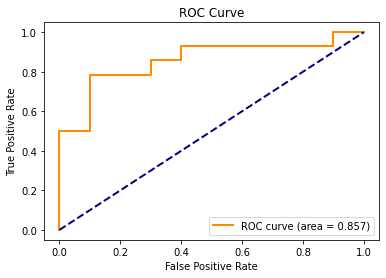

In [22]:
plot_roc(fprs, tprs, auc)

### 15 [1pt] Does the full model or the reduced model have a better ROC and AUC? Explain.

The full model have a better ROC and AUC. ROC curve of reduced model is not close to the top left of the graph, and the AUC of reduced model (0.857) is smaller than one of the full model (1.0).

## Next, we would like to conduct the log likelihood ratio test comparing the full and reduced model.

### 16 [1pt] First, give the null and alternative hypotheses for this test below.

$
\begin{align}
H_0: &\quad \mbox{Model 0 is correct},\\
\\
H_A: &\quad \mbox{Model 0 is incorrect because the missing 'has_a_profile_pic' and 'number_of_post' coefficients in model 0 is not zero}.\\
\end{align}
$

### 17 [1pt] Next, calculate the test statistic for this hypothesis test.

In [23]:
llf0, df0 = mod0.llf, mod0.df_model
llf1, df1 = mod1.llf, mod1.df_model
llr, dfdiff = -2*(llf0 - llf1), df1 - df0
pd.DataFrame({'-2*llf': [-2*llf0, -2*llf1, llr], 
              'df_model': [df0, df1, dfdiff]}, 
             index=['model0','model1', 'diff'])

,-2*llf,df_model
model0,59.976624,4.0
model1,25.625915,6.0
diff,34.350709,2.0


### 18 [1pt] What is the degrees of freedom that correspond to this test?

The degree of fredom is 2 because 2 slopes are deleted from the full model: "has_a_profile_pic" and "number_of_posts"

### 19 [1pt] Calculate the p-value that corresponds to this test.

In [24]:
from scipy.stats import chi2
1 - chi2.cdf(llr, df=dfdiff)

3.474068677178366e-08

### 20  [1pt] Make a conclusion about the hypotheses using this p-value and a $\alpha=0.05$.

Since p_value = 3.47 x $\ 10^{-8}$ < $\alpha=0.05$, we reject the null hypothesis and favor model 1 over model 0. "has_a_profile_pic" and "number_of_posts" are significant factor associated with the response value of whether the account is fake or not

### 21  [1pt] Use the AIC and the BIC of the full and reduced model to determine which model is more parsimonious. (Ie. which model has a better balance of simplicity and predictive power)?

Both BIC and AIC of full model are smaller, favoring model1. This suggests that model 0 is too simple, so the bias due to omitted variables is too large for this model compared to Model 1.

In [25]:
pd.DataFrame({'AIC': [mod0.aic, mod1.aic],
              'BIC': [mod0.bic, mod1.bic]},
             index=[0,1])

,AIC,BIC
0,69.976624,82.798365
1,39.625915,57.576352


### 22 [1pt] Finally, let's create one more model (call this model 2) with our training data that predicts whether the account is fake with the following explanatory variables:
* has_a_profile_pic
* number_of_words_in_name
* num_characters_in_bio
* number_of_followers
* number_of_follows

### Print the output here.

In [26]:
mod2=smf.logit('y ~ has_a_profile_pic + number_of_words_in_name + num_characters_in_bio + number_of_followers + number_of_follows',data=df_train).fit()
mod2.summary()

         Current function value: 0.133473
         Iterations: 35


C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Tuan\Coding\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Tuan\Coding\Python\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.8072
Time:                        17:44:10   Log-Likelihood:                -12.813
converged:                      False   LL-Null:                       -66.459
Covariance Type:            nonrobust   LLR p-value:                 1.531e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   90.7804   8.17e+04      0.001      0.999    -1.6e+05     1.6e+05
has_a_profile_pic[T.yes]   -87.0014   8.17e+04     -0.001      0.999    -1.6e+05     1.6e+05
number_of_words_in_name     -1.0322      0.540     -1.911      0.056      -2.091       0.026
num_characters_in_bio       -0.1018      0.043     -2.356      0.018      -0.186      -0.017
number_of_followers         -0.0245      0.009     -2.766      0.006      -0.042      -0.007
number_of_follows            0.0081      0.003      3.015      0.003       0.003       0.013
============================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 23  [1pt] Finally, compare the AIC and BIC of the following three models to determine which is the most parsimonious.
* Full model
* Reduced model
* Model 2

In [28]:
pd.DataFrame({'Model': ['Reduced model','Full model', 'Model 2'],
              'AIC': [mod0.aic, mod1.aic, mod2.aic],
              'BIC': [mod0.bic, mod1.bic, mod2.bic]},
             index=[0,1,2])

,Model,AIC,BIC
0,Reduced model,69.976624,82.798365
1,Full model,39.625915,57.576352
2,Model 2,37.626734,53.012823


Model 2 has the lowest AIC and BIC. Therefore, model 2 is the most parsimonious model.